<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_4_deoldify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 7: Generative Adversarial Networks**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 7 Material

* Part 7.1: Introduction to GANS for Image and Data Generation [[Video]](https://www.youtube.com/watch?v=0QnCH6tlZgc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_1_gan_intro.ipynb)
* Part 7.2: Train StyleGAN3 with your Own Images [[Video]](https://www.youtube.com/watch?v=T-MCludVNn4&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_2_Keras_gan.ipynb)
* Part 7.3: Exploring the StyleGAN Latent Vector [[Video]](https://www.youtube.com/watch?v=s1UQPK2KoBY&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_3_style_gan.ipynb)
* **Part 7.4: GANS to Enhance Old Photographs Deoldify** [[Video]](https://www.youtube.com/watch?v=ZPewmEu7644&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_4_gan_semi_supervised.ipynb)
* Part 7.5: GANs for Tabular Synthetic Data Generation [[Video]](https://www.youtube.com/watch?v=cvCvZKvlvq4&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_5_gan_research.ipynb)




# Part 7.4: GANS to Enhance Old Photographs Deoldify

For the last two parts of this module, we will examine two applications of GANs.  The first application is named [deoldify](https://deoldify.ai/), which uses a PyTorched based GAN to transform old photographs into more modern-looking images. The complete [source code](https://github.com/jantic/DeOldify) to Deoldify is provided, along with several example [notebooks](https://colab.research.google.com/github/jantic/DeOldify/blob/master/ImageColorizerColab.ipynb) upon which I based this part. 

### Install Needed Software

We begin by cloning the deoldify repository.

In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify
%cd DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 2327, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 2327 (delta 47), reused 27 (delta 10), pack-reused 2228
Receiving objects: 100% (2327/2327), 69.46 MiB | 44.45 MiB/s, done.
Resolving deltas: 100% (1054/1054), done.
/content/DeOldify


Install any additional Python packages needed.

In [2]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 214 kB 5.2 MB/s 
     |████████████████████████████████| 129 kB 75.2 MB/s 
     |████████████████████████████████| 1.9 MB 68.2 MB/s 
     |████████████████████████████████| 78 kB 8.8 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26324 sha256=bedc00e3ea71149e4c23154121c0b50724bb0d9c4987853bb46254b6a7bfc4e5
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


Install the pretrained weights for deoldify.

In [3]:
!mkdir './models/'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

--2021-12-27 19:21:36--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  3.30MB/s    in 2m 40s  

2021-12-27 19:24:17 (1.52 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



The authors of deoldify suggest that you might wish to include a watermark to let others know that AI-enhanced this picture.  The following code downloads this standard watermark. The authors describe the watermark as follows:

"This places a watermark icon of a palette at the bottom left corner of the image. This is intended to be a standard way to convey to others viewing the image that it is colorized by AI. We want to help promote this as a standard, especially as the technology continues to improve and the distinction between real and fake becomes harder to discern. This palette watermark practice was initiated and lead by the company MyHeritage in the MyHeritage In Color feature (which uses a newer version of DeOldify than what you're using here)."

In [4]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O /content/DeOldify/resource_images/watermark.png

--2021-12-27 19:24:17--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘/content/DeOldify/resource_images/watermark.png’

/content/DeOldify/r 100%[===================>]   8.99K  --.-KB/s    in 0s      

2021-12-27 19:24:17 (86.5 MB/s) - ‘/content/DeOldify/resource_images/watermark.png’ saved [9210/9210]



### Initialize Torch Device

First, we must initialize a Torch device.  If we have a GPU available, we will detect it here.  I assume that you will run this code from Google CoLab, with a GPU.  It is possible to run this code from a local GPU; however, some modification will be necessary.

In [5]:
import sys

#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
  print('GPU not available.')
else:
  print('Using GPU.')

Using GPU.


We can now call the model.  I will enhance an image from my childhood, probably taken in the late 1970s.  The picture shows three miniature schnauzers.  My childhood dog (Scooby) is on the left, followed by his mom and sister. Overall, a stunning improvement.  However, the red in the fire engine riding toy is lost and the red color of the picnic table where the three dogs were sitting. 

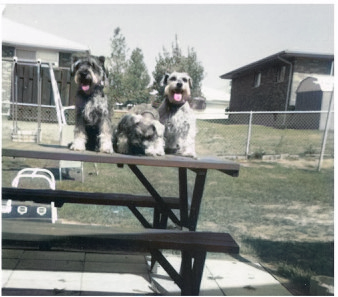

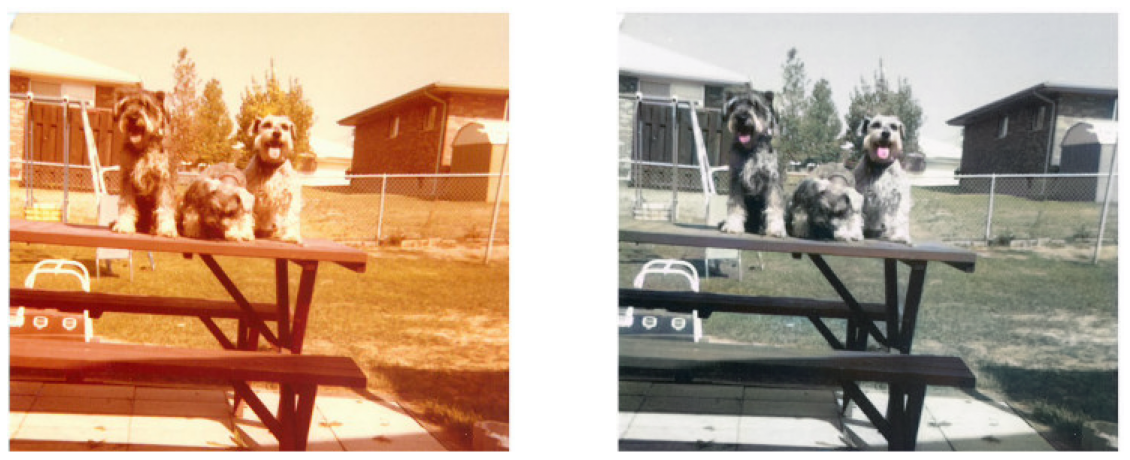

In [7]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

URL = 'https://github.com/jeffheaton/t81_558_deep_learning/blob/master/photos/scooby_family.jpg?raw=true' 
RENDER_FACTOR = 35  
WATERMARK = False

colorizer = get_image_colorizer(artistic=True)

image_path = colorizer.plot_transformed_image_from_url(
    url=URL, render_factor=RENDER_FACTOR, 
    compare=True, 
    watermarked=WATERMARK)
show_image_in_notebook(image_path)
